### Treść zadania

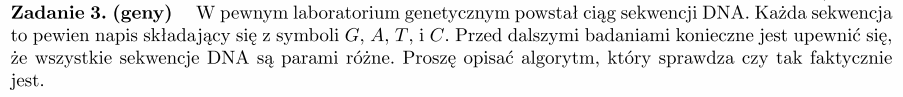

# Sposób I (niewydajny)

### Omówienie algorytmu

Algorytm nie jest zbyt wydajny, ponieważ nie jest powiedziane, z ilu znaków maksymalnie mogą składać się sekwencje DNA. Ta implementacja zakładała przemapowanie wszystkich sekwencji DNA na liczby w systemie o podstawie $ 5 $, ponieważ mamy 4 różne litery (ale jeżeli wybralibyśmy system o podstawie $ 4 $ i przyporządkowali np. literze $ A $ cyfrę $ 0 $, to np. sekwencje $ AAAG $ i $ G $ uznanye zostałyby za takie same sekwencje - w liczbach pomijane są początkowe zera, a do tego nie chcemy dopuścić). Następnie, wykorzystalibyśmy drzewo binarne w sposób podobny do zbiorów w Pythonie do sprawdzania, czy dane drzewo zawiera już dany ciąg DNA. Jeżeli nie, to wstawilibyśmy liczbę, która odpowiada temu ciągowi DNA do drzewa, a jeżeli nie to mamy powtarzającą się sekwencję. Algorytm jest niewydajny z tego względu, że dla dużych liczb operacje porównania są wolne (mimo, że Python nie ma ograniczenia na liczbę znaków w liczbach, więc problem nie wynika z tego powodu, a jedynie ze spowolnienia porównań oraz dużo większej ilości potrzebnej pamięci niż w rozwiązaniu zaprezentowanym później).

### Złożoność

###### Obliczeniowa:
$ O(n \cdot m + n \cdot h) $, gdzie $ m $ - długość najdłuższego ciągu, $ n $ - liczba ciągów, $ h $ - wysokość drzewa jakie powstanie (optymalnie $ h = log(n) $, w najgorzym przypadku $ h = n $).
###### Pamięciowa:
$ O(n) $ - złożoność niby niewielka, ale nie uwzglęniamy pamięci potrzebnej na zapisanie dużych liczb.

### Implementacja

In [1]:
def string_to_num_init(possible_letters: 'only english uppercase letters'):
    codes = [0] * 26
    i = 1
    ord_A = ord('A')
    for letter in possible_letters:
        idx = ord(letter) - ord('A')
        if not codes[idx]:
            codes[idx] = i
            i += 1
    base = i
    
    def string_to_num(string):
        num = 0
        for c in string:
            digit = codes[ord(c) - ord_A]
            num *= base
            num += digit
        return num
    
    return string_to_num


class BSTNode:
    def __init__(self, key):
        self.key = key
        self.left = self.right = None

        
class BST:
    def __init__(self):
        self.root = None
        
    def insert(self, key):
        node = BSTNode(key)
        if not self.root:
            self.root = node    
        else:
            curr = self.root
            while True:
                # Enter the right subtree if a key of a value inserted is
                # greater than the key of the current BST node
                if node.key > curr.key:
                    if curr.right: 
                        curr = curr.right
                    else: 
                        curr.right = node
                        break
                # Enter the left subtree if a key of a value inserted is
                # lower than the key of the current BST node
                elif node.key < curr.key:
                    if curr.left:
                        curr = curr.left
                    else:
                        curr.left = node
                        break
                # Return False if a node with the same key already exists
                # (We won't change its value)
                else:
                    return False
        # Return True if an object was successfully inserted to BST
        return True
    
    
def are_all_unique(dna_sequences, possible_letters='GATC'):
    string_to_num = string_to_num_init(possible_letters)
    t = BST()
    
    for dna in dna_sequences:
        # Return False if cannot insert a number to the tree
        # (that means there is the same number in a tree so we
        # found the same DNA sequence)
        if not t.insert(string_to_num(dna)):
            return False
    return True

###### Kilka testów

##### Pomocnicze:

In [2]:
DNA = ['GA', 'AT', 'TTAGA', 'GATATA', 'TACC', 'CAT', 'TAC', 'CC', 'GA', 'GACATA']

print(are_all_unique(DNA))

False


### (Dodatkowo) Znajdowanie wszystkich powtarzających się sekwencji

Zmodyfikowałem tak metodę $ insert $, aby zapisywała informację, czy już znaleźliśmy wcześniej tę samą wartość. W ten spośob, jeżeli jest kilka tych samych powtórek, zapamiętyamy tylko jedną.

In [3]:
def string_to_num_init(possible_letters: 'only english uppercase letters'):
    codes = [0] * 26
    i = 1
    ord_A = ord('A')
    for letter in possible_letters:
        idx = ord(letter) - ord('A')
        if not codes[idx]:
            codes[idx] = i
            i += 1
    base = i
    
    def string_to_num(string):
        num = 0
        for c in string:
            digit = codes[ord(c) - ord_A]
            num *= base
            num += digit
        return num
    
    return string_to_num


class BSTNode:
    def __init__(self, key):
        self.key = key
        self.left = self.right = None
        self.is_repated = False

        
class BST:
    def __init__(self):
        self.root = None
        
    def insert(self, key):
        node = BSTNode(key)
        if not self.root:
            self.root = node    
        else:
            curr = self.root
            while True:
                # Enter the right subtree if a key of a value inserted is
                # greater than the key of the current BST node
                if node.key > curr.key:
                    if curr.right: 
                        curr = curr.right
                    else: 
                        curr.right = node
                        break
                # Enter the left subtree if a key of a value inserted is
                # lower than the key of the current BST node
                elif node.key < curr.key:
                    if curr.left:
                        curr = curr.left
                    else:
                        curr.left = node
                        break
                else:
                    if not curr.is_repated:
                        curr.is_repated = True
                        return False
                    return True
        return True
    
    
def find_repeated(dna_sequences, possible_letters='GATC'):
    string_to_num = string_to_num_init(possible_letters)
    t = BST()
    
    repeated = []
    
    for dna in dna_sequences:
        if not t.insert(string_to_num(dna)):
            repeated.append(dna)
    return repeated

###### Kilka testów

##### Pomocnicze:

In [4]:
DNA = ['GA', 'AT', 'TTAGA', 'GATATA', 'TACC', 'CAT', 'TAC', 'CC', 'GA', 'GACATA', 'GA', 'GA', 'CC', 'TATA']

print(find_repeated(DNA))

['GA', 'CC']


# Sposób II (lepszy)

### Złożoność

###### Obliczeniowa:
$ O(n \cdot m) $  - bo jednocześnie dodajemy węzły do drzewa i sprawdzamy, czy istnieje taka sama sekwencja DNA
###### Pamięciowa:
$ O(n \cdot m) $  - bo mogą być wszystkie różne

### Implementacja

In [5]:
class PrefixTreeNode:
    def __init__(self, branches):
        self.children = [None] * branches
        self.is_end = False

    
def minmax(arr):
    global_min = global_max = arr[-1]
    
    for i in range(0, len(arr)-1, 2):
        if arr[i] > arr[i+1]:
            if arr[i] > global_max:   global_max = arr[i]
            if arr[i+1] < global_min: global_min = arr[i+1]
        else:
            if arr[i+1] > global_max: global_max = arr[i+1]
            if arr[i] < global_min:   global_min = arr[i]
    return global_min, global_max
        
        
class PrefixTree:
    def __init__(self, possible_letters):
        min_c, max_c = minmax(possible_letters)
        self.min_ord = ord(min_c)
        self.max_ord = ord(max_c)
        self.indices = [-1] * (self.max_ord - self.min_ord + 1)
        i = 0
        
        for c in possible_letters:
            idx = ord(c) - self.min_ord
            if self.indices[idx] < 0:
                self.indices[idx] = i
                i += 1
                
        self.uniq_chars = i
        self.root = self.new_node()
        
    def new_node(self):
        return PrefixTreeNode(self.uniq_chars)
    
    def get_index(self, char):
        return self.indices[ord(char) - self.min_ord]
    
    def insert(self, string):
        node = self.root
        
        for c in string:
            idx = self.get_index(c)
            if not node.children[idx]:
                node.children[idx] = self.new_node()
            node = node.children[idx]
        
        # Return True if found a repeated sequence
        is_repeated = node.is_end
        node.is_end = True
        return is_repeated
    
    
def are_all_unique(dna_sequences, possible_letters='GATC'):
    pt = PrefixTree(possible_letters)
    
    for dna in dna_sequences:
        # Return False if found the same sequence in a tree
        if pt.insert(dna):
            return False
    return True

###### Kilka testów

##### Pomocnicze:

In [6]:
DNA = ['GA', 'AT', 'TTAGA', 'GATATA', 'TACC', 'CAT', 'TAC', 'CC', 'GA', 'GACATA']

print(are_all_unique(DNA))

False


### (Dodatkowo) Znajdowanie wszystkich powtarzających się sekwencji

In [7]:
class PrefixTreeNode:
    def __init__(self, branches):
        self.children = [None] * branches
        self.is_end = False
        self.found_before = False

    
def minmax(arr):
    global_min = global_max = arr[-1]
    
    for i in range(0, len(arr)-1, 2):
        if arr[i] > arr[i+1]:
            if arr[i] > global_max:   global_max = arr[i]
            if arr[i+1] < global_min: global_min = arr[i+1]
        else:
            if arr[i+1] > global_max: global_max = arr[i+1]
            if arr[i] < global_min:   global_min = arr[i]
    return global_min, global_max
        
        
class PrefixTree:
    def __init__(self, possible_letters):
        min_c, max_c = minmax(possible_letters)
        self.min_ord = ord(min_c)
        self.max_ord = ord(max_c)
        self.indices = [-1] * (self.max_ord - self.min_ord + 1)
        i = 0
        
        for c in possible_letters:
            idx = ord(c) - self.min_ord
            if self.indices[idx] < 0:
                self.indices[idx] = i
                i += 1
                
        self.uniq_chars = i
        self.root = self.new_node()
        
    def new_node(self):
        return PrefixTreeNode(self.uniq_chars)
    
    def get_index(self, char):
        return self.indices[ord(char) - self.min_ord]
    
    def insert(self, string):
        node = self.root
        
        for c in string:
            idx = self.get_index(c)
            if not node.children[idx]:
                node.children[idx] = self.new_node()
            node = node.children[idx]
        
        # Return True if found a repeated sequence
        # for the first time
        if not node.found_before:
            is_repeated = node.is_end
            node.is_end = True
            if is_repeated:
                node.found_before = True
                return True
        return False
    
    
def find_repeated(dna_sequences, possible_letters='GATC'):
    pt = PrefixTree(possible_letters)
    
    repeated = []
    
    for dna in dna_sequences:
        if pt.insert(dna):
            repeated.append(dna)
    return repeated

###### Kilka testów

##### Pomocnicze:

In [8]:
DNA = ['GA', 'AT', 'TTAGA', 'GATATA', 'TACC', 'CAT', 'TAC', 'CC', 'GA', 'GACATA', 'GA', 'GA', 'CC', 'TATA']

print(find_repeated(DNA))

['GA', 'CC']
